In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement des données

## 1. Importation des données avec pandas

In [3]:
df = pd.read_csv("../datas/dataset.csv")

## 2. Type et structure des colonnes

In [4]:
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148,72,35,0,33.6,0.627,50
1,1,1,85,66,29,0,26.6,0.351,31
2,2,8,183,64,0,0,23.3,0.672,32
3,3,1,89,66,23,94,28.1,0.167,21
4,4,0,137,40,35,168,43.1,2.288,33


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Analyse exploratoire des données

## 1. Comprendre la structure générale du jeu de données

### a. Dimensions

In [6]:
df.shape

(768, 9)

- Nombre de colonnes : 9
- Nombre de Lignes : 768

### b. Type

In [7]:
df.dtypes

Unnamed: 0                    int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

### c. Aperçu

In [8]:
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,6,148,72,35,0,33.6,0.627,50
1,1,1,85,66,29,0,26.6,0.351,31
2,2,8,183,64,0,0,23.3,0.672,32
3,3,1,89,66,23,94,28.1,0.167,21
4,4,0,137,40,35,168,43.1,2.288,33


## 2. Identifier les valeurs manquantes et les doublons

### a. Valeur manquante

In [9]:
df.isnull().sum()

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

Il n'y a aucune valeur manquante

### b. Doublons

In [10]:
df.columns.duplicated().sum()

np.int64(0)

Il n'y a aucun doublons

### c. Suppression de la colonne 'Unnameed'

In [11]:
df.drop(columns={'Unnamed: 0'}, axis=1, inplace=True)

In [12]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


### 3. Analyser la distribution des variables numériques

In [13]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


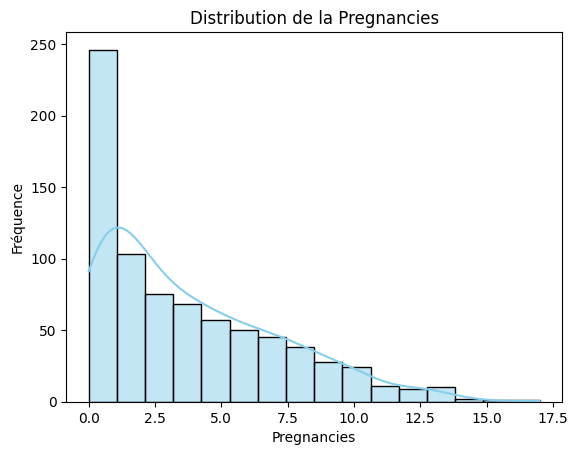

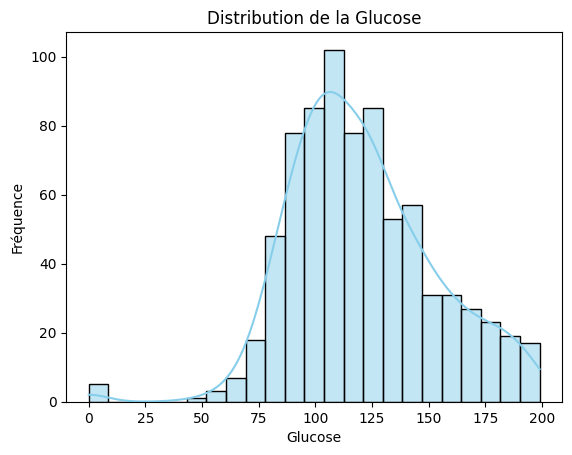

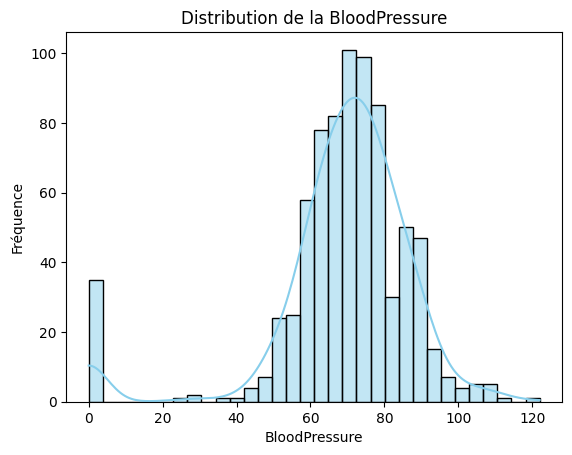

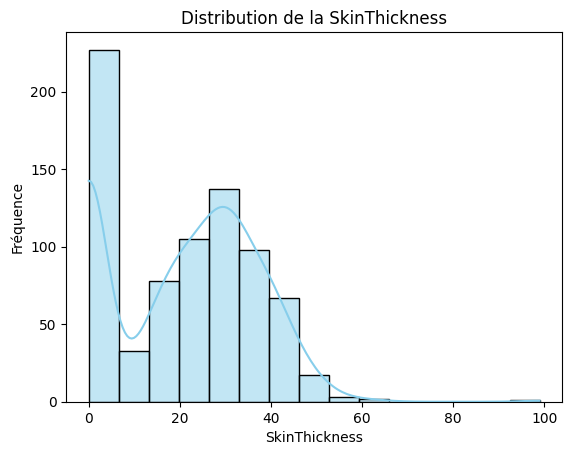

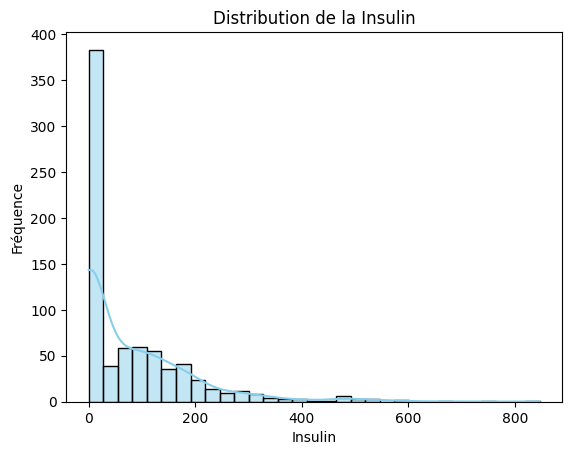

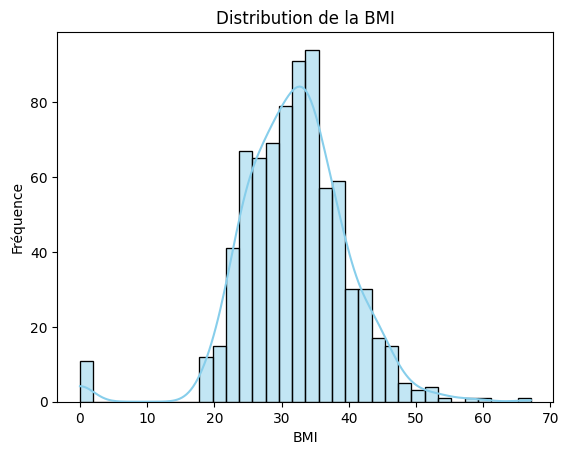

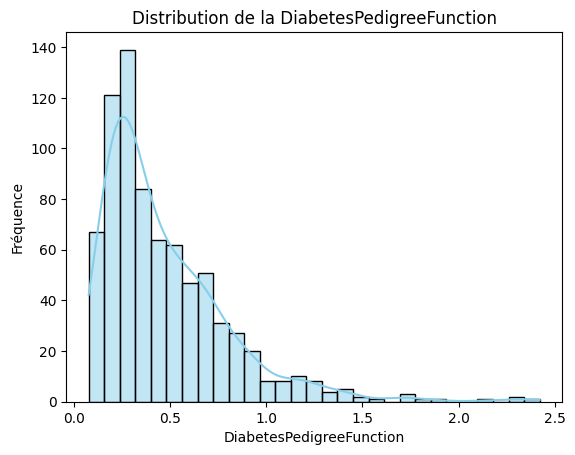

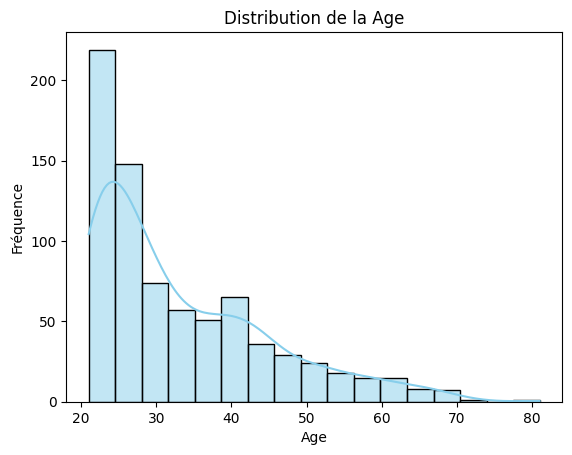

In [14]:
for i in df.select_dtypes(include = "number").columns.tolist():
    sns.histplot(df[i], kde=True, color="skyblue")
    plt.title(f"Distribution de la {i}")
    plt.xlabel(i)
    plt.ylabel("Fréquence")
    plt.show()

### 4. Etude des relations entre les variables

### a. Matrice de corrélation

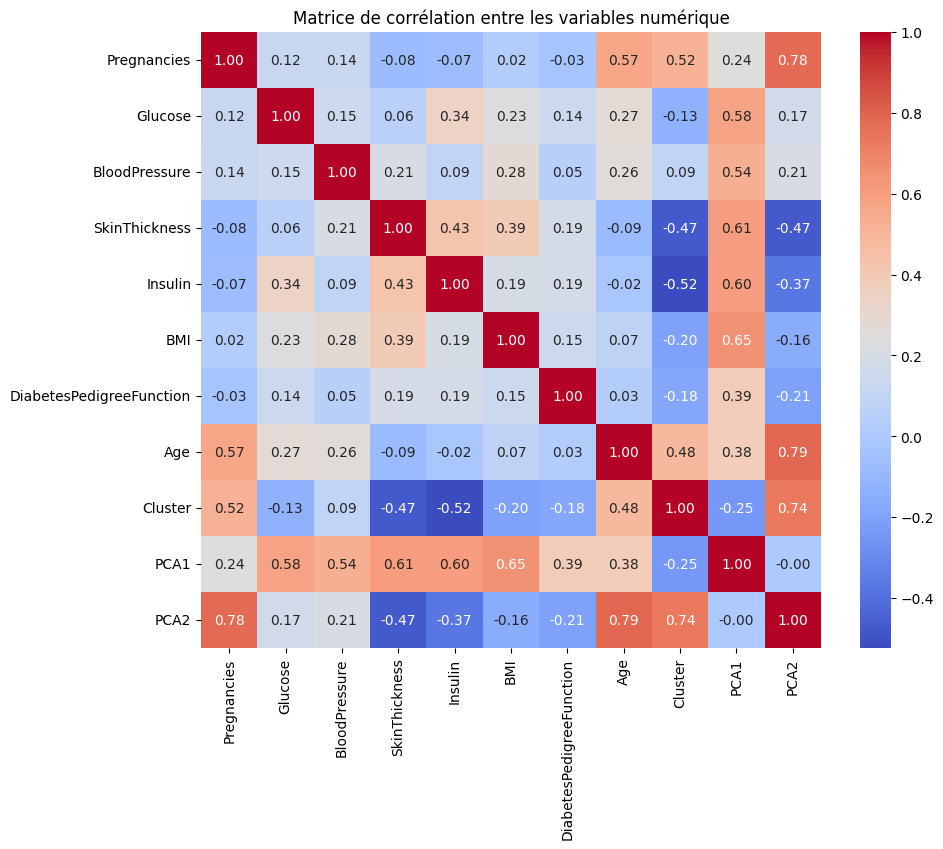

In [45]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation entre les variables numérique")
plt.show()

# Prétraitement des données

### 1. Gestion des valeurs manquantes

Vue qu'il n'y a pas de valeurs manquantes on a pas besoin de les traiter

### 2. Détéction et suppression des valeurs aberrante

### 2.1 Détection des valeurs aberrantes

### a. Methode des interquarties

In [16]:
def outliers(dframe):
    outliers = dframe.copy()
    for i in dframe.select_dtypes(include="number").columns.tolist():
        q1 = dframe[i].quantile(0.25)
        q3 = dframe[i].quantile(0.75)
        iqr = q3 - q1
        b_inf = q1 - 1.5*iqr
        b_sup = q3 + 1.5*iqr
        outliers = dframe[(dframe[i] < b_inf) | (dframe[i] > b_sup)]
    return outliers
outliers = outliers(df)
outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
123,5,132,80,0,0,26.8,0.186,69
363,4,146,78,0,0,38.5,0.520,67
453,2,119,0,0,0,19.6,0.832,72
459,9,134,74,33,60,25.9,0.460,81
489,8,194,80,0,0,26.1,0.551,67
537,0,57,60,0,0,21.7,0.735,67
666,4,145,82,18,0,32.5,0.235,70
674,8,91,82,0,0,35.6,0.587,68
684,5,136,82,0,0,0.0,0.640,69


### b. Mehode boite à moustache 

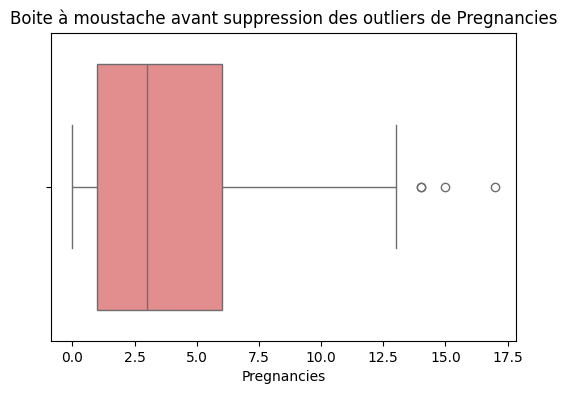

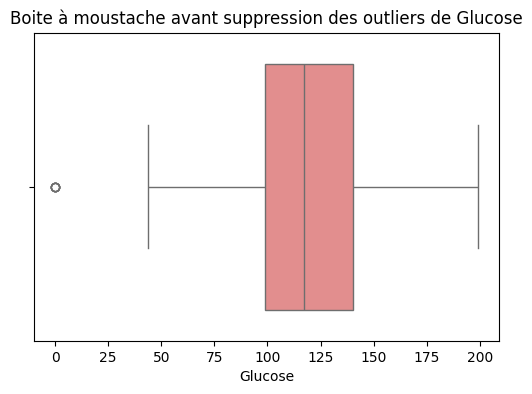

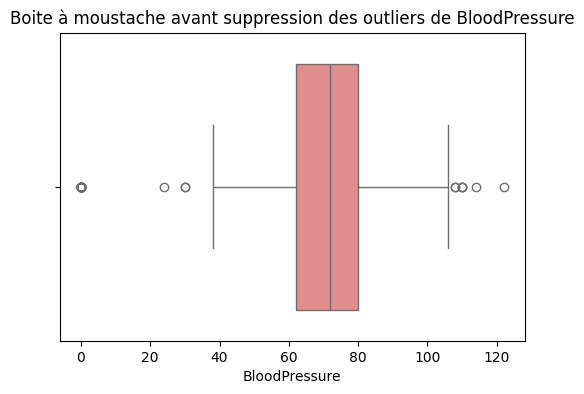

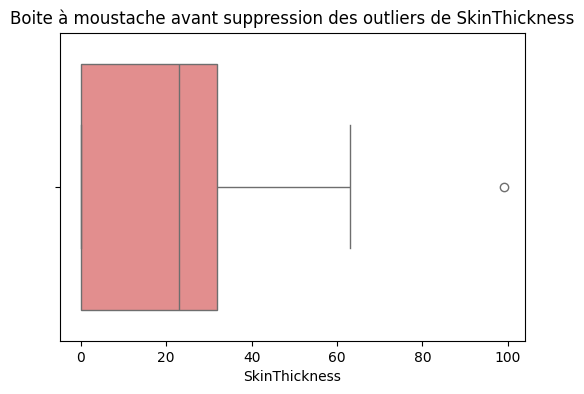

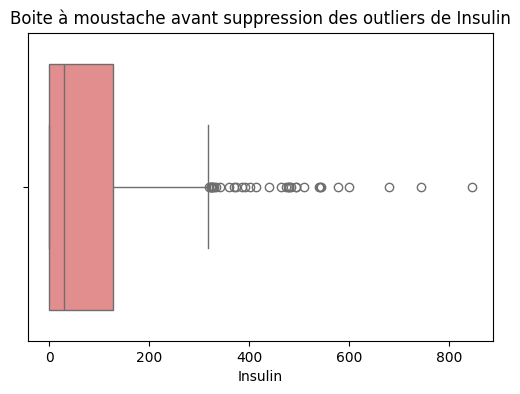

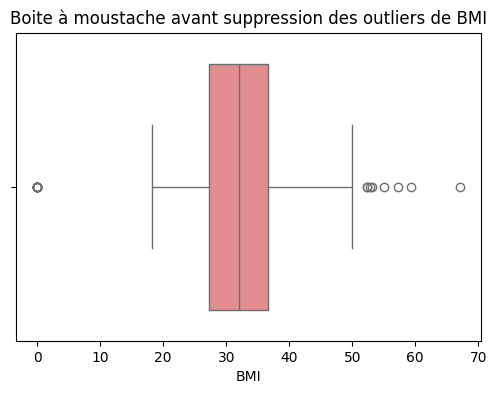

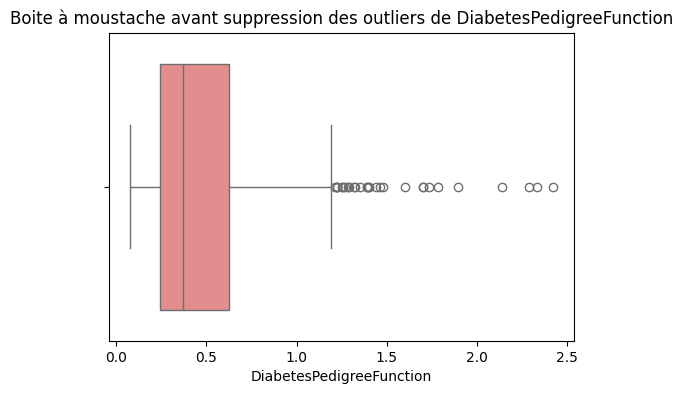

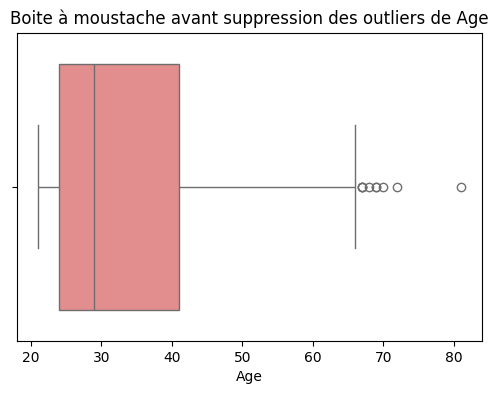

In [17]:
for i in df.select_dtypes(include="number").columns.tolist():
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[i], color="lightcoral")
    plt.title(f"Boite à moustache avant suppression des outliers de {i}")
    plt.show()

### 2.2 Suppression des valeurs aberrantes

In [18]:
def remove_outliers(dframe):
    df_clean = dframe.copy()
    for i in dframe.select_dtypes(include="number").columns.tolist():
        q1 = dframe[i].quantile(0.25)
        q3 = dframe[i].quantile(0.75)
        iqr = q3 - q1
        b_inf = q1 - 1.5*iqr
        b_sup = q3 + 1.5*iqr
        df_clean = dframe[(dframe[i] >= b_inf) & (dframe[i] <= b_sup)]
        
    return df_clean

df_clean=remove_outliers(df)
df_clean


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [19]:
df_clean.shape

(759, 8)

### 3. Analyse exploratoire des relations entre variables

Choix des colonnes jugées significatives: Glucose, BMI, Age, DiabetesPedigreeFunction.

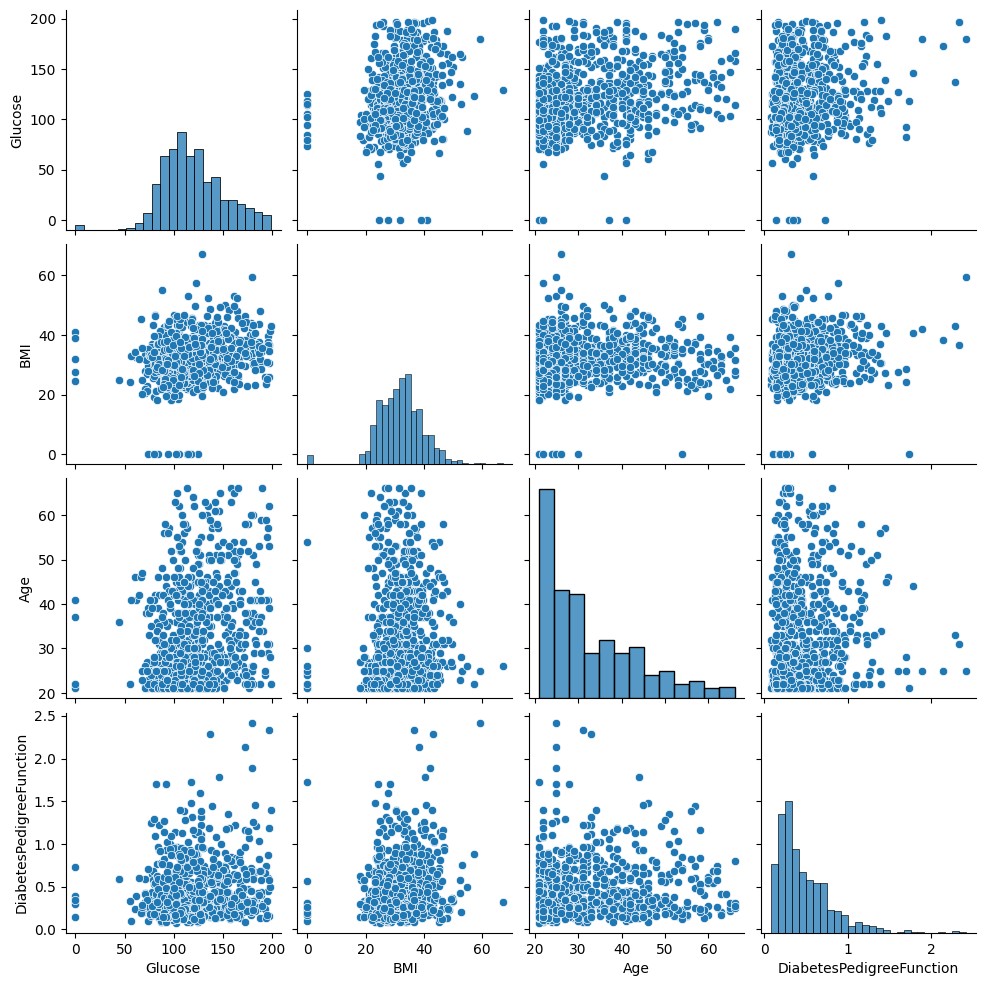

In [20]:
cols = ["Glucose", "BMI", "Age", "DiabetesPedigreeFunction"]
sns.pairplot(df_clean[cols])
plt.show()

### 4. Mise à l’échelle des variables grace à la technique de centrage-réduction(StandardScaler)

In [21]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
X_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.643271,0.852627,0.149988,0.898192,-0.698085,0.195616,0.468793,1.548281
1,-0.839847,-1.122763,-0.161479,0.520991,-0.698085,-0.701269,-0.361774,-0.162527
2,1.236518,1.950066,-0.265301,-1.302146,-0.698085,-1.124086,0.604211,-0.072485
3,-0.839847,-0.997341,-0.161479,0.143790,0.115386,-0.509079,-0.915485,-1.062953
4,-1.136471,0.507718,-1.511169,0.898192,0.755778,1.412818,5.467240,0.017558
...,...,...,...,...,...,...,...,...
754,1.829765,-0.621076,0.357633,1.715460,0.859625,0.105928,-0.903448,2.718835
755,-0.543224,0.037387,0.046166,0.395257,-0.698085,0.605621,-0.394876,-0.522698
756,0.346647,0.006031,0.149988,0.143790,0.271157,-0.752519,-0.680760,-0.252570
757,-0.839847,0.162808,-0.472946,-1.302146,-0.698085,-0.252826,-0.367793,1.278154


# 1. Entrainement des modèles de clustering

## 1.a Clustering avec K-Means

- Déterminer la valeur optimale de k via la méthode du coude.

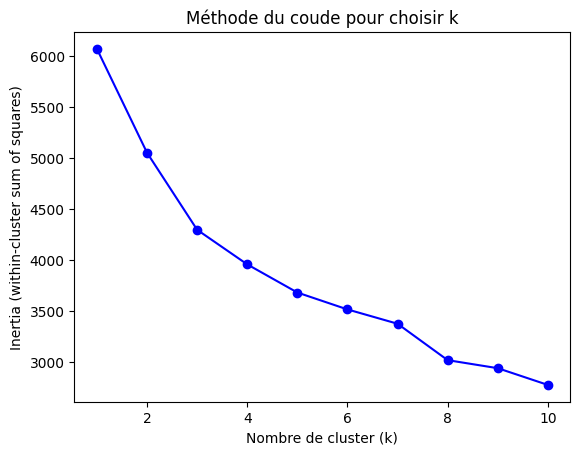

In [23]:
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

#Visualisation de la courbe d’inertie pour appuyer le choix de k.
plt.plot(K, inertia, 'bo-')
plt.xlabel('Nombre de cluster (k)')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.title("Méthode du coude pour choisir k")
plt.show()

Vue que le k est là où l'inertie commence à diminuer le moin rapidement, donc k=3 

- Entraînement d'un modèle K-Means avec le nombre de clusters choisi

In [24]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

- Ajout d'une colonne Cluster au dataset indiquant le groupe assigné à chaque individu.

In [25]:
df = df_clean.copy()
df["Cluster"] = kmeans.labels_
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,2
764,2,122,70,27,0,36.8,0.340,27,1
765,5,121,72,23,112,26.2,0.245,30,1
766,1,126,60,0,0,30.1,0.349,47,2


## 1.b Réduction de dimensionnalité pour visualisation

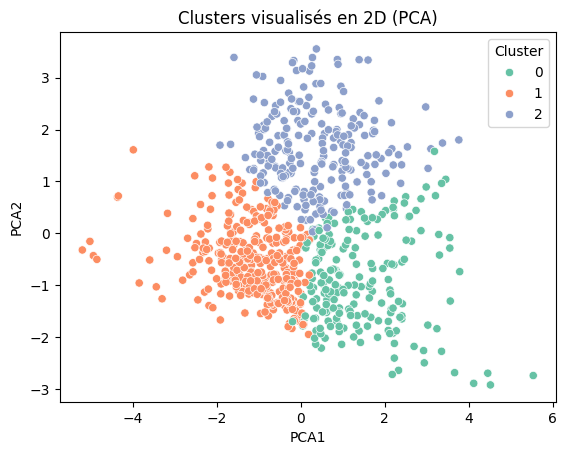

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"] = X_pca[:,0]
df["PCA2"] = X_pca[:,1]
sns.scatterplot(data = df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2")
plt.title("Clusters visualisés en 2D (PCA)")
plt.show()

- Moyenne par Cluster

In [27]:
df.groupby("Cluster")[["Glucose", "BMI", "Age", "DiabetesPedigreeFunction"]].mean()

,Glucose,BMI,Age,DiabetesPedigreeFunction
Cluster,,,,
0,140.838235,37.087745,31.063725,0.607755
1,103.054545,28.627273,25.651515,0.407812
2,128.684444,32.580889,44.875556,0.440422


1. les moyennes des variables Glucose > 130 et BMI > 30 Diabetes Pedigree Function >0,5 donc le Clustur 0 est à haut risque de diabète
2. les moyennes des variables Glucose < 130 et BMI < 30 Diabetes Pedigree Function <0,5 donc le Clustur 1 est à faible risque de diabète
3. les moyennes des variables Glucose < 130 et BMI > 30 Diabetes Pedigree Function <0,5 donc le Clustur 2 est à risque moyen de diabète

- Compter le nombre d’observations par groupe

In [28]:
df["Cluster"].value_counts()

Cluster
1    330
2    225
0    204
Name: count, dtype: int64

- Ajout d'une colonne risk_category basée sur le numero de cluster

In [29]:
cluster_dist = {
    0 : "Haut Risque",
    1 : "Faible Risque",
    2 : "Risque Moyen"
}

df["risk_category"] = df["Cluster"].map(cluster_dist)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster,PCA1,PCA2,risk_category
0,6,148,72,35,0,33.6,0.627,50,2,1.197738,1.222014,Risque Moyen
1,1,85,66,29,0,26.6,0.351,31,1,-1.166865,-0.613462,Faible Risque
2,8,183,64,0,0,23.3,0.672,32,2,-0.305326,1.606851,Risque Moyen
3,1,89,66,23,94,28.1,0.167,21,1,-1.231991,-1.168011,Faible Risque
4,0,137,40,35,168,43.1,2.288,33,0,2.231925,-2.403394,Haut Risque
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,2,1.763671,1.960710,Risque Moyen
764,2,122,70,27,0,36.8,0.340,27,1,-0.153084,-0.578357,Faible Risque
765,5,121,72,23,112,26.2,0.245,30,1,-0.294631,0.148711,Faible Risque
766,1,126,60,0,0,30.1,0.349,47,2,-0.953132,0.969148,Risque Moyen


## 2. Classification supervisée (basée sur les clusters)

### 2.a Préparation des données pour la classification

- Définition de la variable y à partir de la colonne Cluster

In [30]:
y = df["Cluster"]

- Définition de la variable X à partir des variables séléctionné

In [31]:
features = ["Glucose", "BMI", "Age", "DiabetesPedigreeFunction"]
X = df[features]

In [32]:
X.shape

(759, 4)

In [33]:
y.shape

(759,)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Gestion du déséquilibre des classes avec la technique de sous-échantiyonnage

In [35]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

print("Avant équilibrage :", Counter(y))

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print("Après équilibrage :", Counter(y_resampled))


Avant équilibrage : Counter({1: 330, 2: 225, 0: 204})
Après équilibrage : Counter({2: 330, 1: 330, 0: 330})


### 2.b. Entraînement de plusieurs modèles de classification 

- Random Forest Support, Vector Machine, Gradient Boosting Decision, Tree Regression Logistic

In [36]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Pour RandomForest
model_rs = RandomForestClassifier(random_state = 42)
model_rs.fit(X_train, y_train)

# Pour SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled
model_svm = SVC(random_state=42, class_weight="balanced")
model_svm.fit(X_train, y_train)

#Pour GradientBoosting
model_gb = GradientBoostingClassifier(random_state = 42)
model_gb.fit(X_train, y_train)

#Pour Tree Logistic Regression

model_tr = LogisticRegression(random_state=42, max_iter=10000)
model_tr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

- Évaluation des modèles

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(name, model, X_test, y_test, scaled=False):
    # Choix des données (scalées ou non)
    if scaled:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n Résultats pour {name}:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision (moyenne pondérée):", precision_score(y_test, y_pred, average="weighted", zero_division=0))
    print("Recall (moyenne pondérée):", recall_score(y_test, y_pred, average="weighted"))
    print("F1-score (moyenne pondérée):", f1_score(y_test, y_pred, average="weighted"))
    print("\nRapport détaillé:\n", classification_report(y_test, y_pred))

    # Affichage de la matrice de confusion
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Matrice de confusion - {name}")
    plt.xlabel("Prédit")
    plt.ylabel("Réel")
    plt.show()



 Résultats pour Random Forest:
Accuracy : 0.756578947368421
Precision (moyenne pondérée): 0.7533471837488458
Recall (moyenne pondérée): 0.756578947368421
F1-score (moyenne pondérée): 0.7545513952666902

Rapport détaillé:
               precision    recall  f1-score   support

           0       0.64      0.59      0.61        39
           1       0.80      0.84      0.82        73
           2       0.78      0.78      0.78        40

    accuracy                           0.76       152
   macro avg       0.74      0.73      0.74       152
weighted avg       0.75      0.76      0.75       152



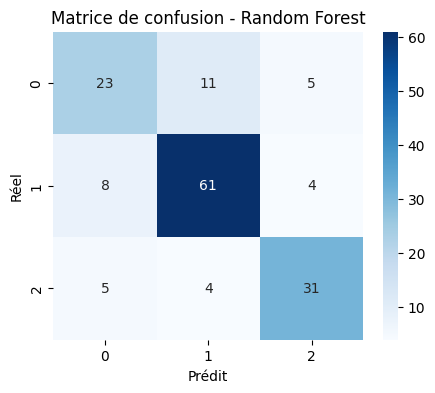

/Users/meissagningue/Projects/dev_ia/risque_diabete_par_analyse_clinique_model_apprentissage/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/meissagningue/Projects/dev_ia/risque_diabete_par_analyse_clinique_model_apprentissage/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/meissagningue/Projects/dev_ia/risque_diabete_par_analyse_clinique_model_apprentissage/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi


 Résultats pour SVM:
Accuracy : 0.48026315789473684
Precision (moyenne pondérée): 0.23065270083102493
Recall (moyenne pondérée): 0.48026315789473684
F1-score (moyenne pondérée): 0.31163742690058477

Rapport détaillé:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.48      1.00      0.65        73
           2       0.00      0.00      0.00        40

    accuracy                           0.48       152
   macro avg       0.16      0.33      0.22       152
weighted avg       0.23      0.48      0.31       152



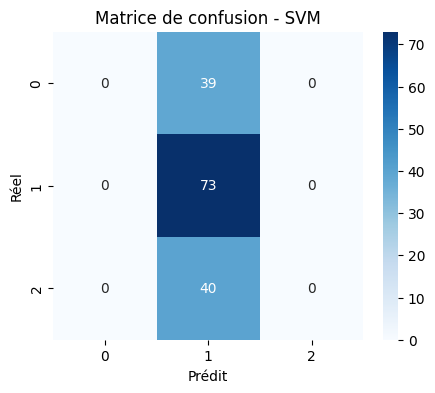


 Résultats pour Gradient Boosting:
Accuracy : 0.7171052631578947
Precision (moyenne pondérée): 0.7151711758706218
Recall (moyenne pondérée): 0.7171052631578947
F1-score (moyenne pondérée): 0.7155502392344498

Rapport détaillé:
               precision    recall  f1-score   support

           0       0.55      0.54      0.55        39
           1       0.78      0.82      0.80        73
           2       0.76      0.70      0.73        40

    accuracy                           0.72       152
   macro avg       0.70      0.69      0.69       152
weighted avg       0.72      0.72      0.72       152



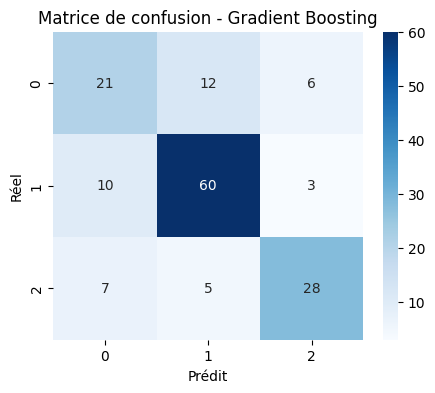

/Users/meissagningue/Projects/dev_ia/risque_diabete_par_analyse_clinique_model_apprentissage/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/meissagningue/Projects/dev_ia/risque_diabete_par_analyse_clinique_model_apprentissage/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/meissagningue/Projects/dev_ia/risque_diabete_par_analyse_clinique_model_apprentissage/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont


 Résultats pour Régression Logistique:
Accuracy : 0.48026315789473684
Precision (moyenne pondérée): 0.23065270083102493
Recall (moyenne pondérée): 0.48026315789473684
F1-score (moyenne pondérée): 0.31163742690058477

Rapport détaillé:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.48      1.00      0.65        73
           2       0.00      0.00      0.00        40

    accuracy                           0.48       152
   macro avg       0.16      0.33      0.22       152
weighted avg       0.23      0.48      0.31       152



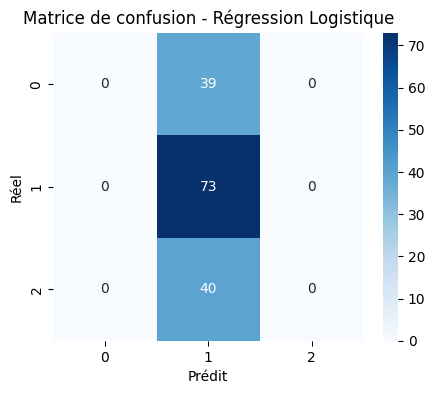

In [38]:
# Random Forest
evaluate_model("Random Forest", model_rs, X_test, y_test, scaled=False)

# SVM
evaluate_model("SVM", model_svm, X_test, y_test, scaled=True)

# Gradient Boosting
evaluate_model("Gradient Boosting", model_gb, X_test, y_test, scaled=False)

# Régression Logistique
evaluate_model("Régression Logistique", model_tr, X_test, y_test, scaled=True)


### 2.c Validation croisée

- Validation croisée avec cross_val_score 

In [39]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=10000)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    if name in ["SVM", "Logistic Regression"]:
        scores = cross_val_score(model, X_scaled, y, cv=cv, scoring="accuracy")
    else:
        scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
    
    print(f"\n{name}")
    print("Scores par fold :", scores)
    print("Moyenne Accuracy :", np.mean(scores))
    print("Écart-type :", np.std(scores))



Random Forest
Scores par fold : [0.78947368 0.71710526 0.76315789 0.73684211 0.74834437]
Moyenne Accuracy : 0.7509846636458697
Écart-type : 0.024431083235272284

SVM
Scores par fold : [0.94078947 0.96710526 0.97368421 0.98026316 0.96688742]
Moyenne Accuracy : 0.9657459044963403
Écart-type : 0.013414482435078263

Gradient Boosting
Scores par fold : [0.78947368 0.71710526 0.73026316 0.73026316 0.76821192]
Moyenne Accuracy : 0.7470634367375392
Écart-type : 0.027231887044608282

Logistic Regression
Scores par fold : [0.98684211 0.99342105 0.98684211 0.99342105 0.98013245]
Moyenne Accuracy : 0.9881317532241198
Écart-type : 0.004965251392301991


### 2.c Optimisation des hyperparamètres

In [40]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
# Optimiser un Random Forest
rf = RandomForestClassifier(random_state=42)

# Grille d’hyperparamètres
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid,
                       cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)

grid_rf.fit(X, y)

print("Meilleurs hyperparamètres pour Random Forest :", grid_rf.best_params_)
print("Meilleure accuracy :", grid_rf.best_score_)


# Optimiser un SVM avec RandomizedSearchCV
param_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

random_svm = RandomizedSearchCV(estimator=model_svm, param_distributions=param_dist,
                                n_iter=10, cv=cv, scoring='accuracy',
                                random_state=42, n_jobs=-1, verbose=1)

random_svm.fit(X_scaled, y)

print("Meilleurs hyperparamètres pour SVM :", random_svm.best_params_)
print("Meilleure accuracy :", random_svm.best_score_)


# Optimiser Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_gb = GridSearchCV(model_gb, param_grid_gb, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
grid_gb.fit(X, y)

print("Meilleurs hyperparamètres pour Gradient Boosting :", grid_gb.best_params_)


# Régression Logistique
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']
}

grid_log = GridSearchCV(model_tr, param_grid_log, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
grid_log.fit(X_scaled, y)

print("Meilleurs hyperparamètres pour Logistic Regression :", grid_log.best_params_)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Meilleurs hyperparamètres pour Random Forest : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Meilleure accuracy : 0.7733617985360752
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs hyperparamètres pour SVM : {'kernel': 'linear', 'gamma': 'scale', 'C': 100}
Meilleure accuracy : 0.9815440920181248
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Meilleurs hyperparamètres pour Gradient Boosting : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs hyperparamètres pour Logistic Regression : {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


### 2.d Sélection et sauvegarde du meilleur modèle

In [41]:
results = {
    "Random Forest": grid_rf.best_score_,
    "SVM": random_svm.best_score_,
    "Gradient Boosting": grid_gb.best_score_,
    "Logistic Regression": grid_log.best_score_
}

results_df = pd.DataFrame(list(results.items()), columns=["Modèle", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)
results_df

,Modèle,Accuracy
3,Logistic Regression,0.990755
1,SVM,0.981544
0,Random Forest,0.773362
2,Gradient Boosting,0.747063


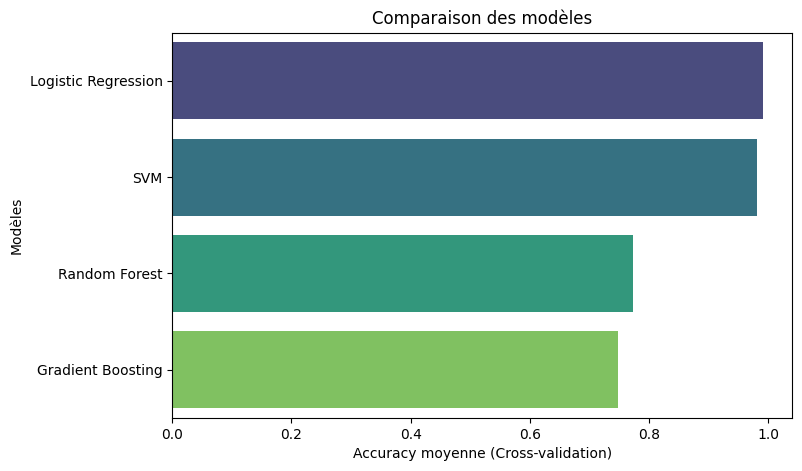

In [42]:
plt.figure(figsize=(8,5))
sns.barplot(x="Accuracy", y="Modèle", hue="Modèle", data=results_df, palette="viridis", legend=False)
plt.title("Comparaison des modèles")
plt.xlabel("Accuracy moyenne (Cross-validation)")
plt.ylabel("Modèles")
plt.show()


In [43]:
best_model_name = results_df.iloc[0]["Modèle"]
print("Meilleur modèle :", best_model_name)

if best_model_name == "Random Forest":
    best_model = grid_rf.best_estimator_
elif best_model_name == "SVM":
    best_model = random_svm.best_estimator_
elif best_model_name == "Gradient Boosting":
    best_model = grid_gb.best_estimator_
else:
    best_model = grid_log.best_estimator_


Meilleur modèle : Logistic Regression


In [44]:
import pickle

with open("../models/best_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("Le meilleur modèle a été sauvegardé dans best_model.pkl")


Le meilleur modèle a été sauvegardé dans best_model.pkl
